In [209]:
%matplotlib notebook

In [228]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [211]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [212]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [213]:
combined_data = pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID", "Mouse ID"])
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [214]:
# Checking the number of mice.
number_of_mice =len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [215]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
print(duplicate_mice)
#get the duplicate mouse ID
duplicate_ID = combined_data.loc[duplicate_mice,"Mouse ID"].unique()
duplicate_ID


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


array(['g989'], dtype=object)

In [216]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_ID = combined_data.loc[combined_data["Mouse ID"]== duplicate_ID[0]]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [217]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
df

# df = combined_data.drop(duplicate_mice_ID.index)
# df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [218]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(df["Mouse ID"].value_counts())
mice_count

249

# Summary Statistics

In [219]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_mean = df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
stat_median = df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
stat_var = df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stat_sd = df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stat_sem = df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = {"Mean Tumor Volume":stat_mean,
            "Median Tumor Volume":stat_median,
            "Tumor Volume Variance":stat_var,
            "Tumor Volume Std. Dev.":stat_sd,
            "Tumor Voulme Std. Err.":stat_sem}
summary_df = pd.DataFrame(summary)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Voulme Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [220]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat = df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [235]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
test_df = df.groupby(["Drug Regimen"]).count()["Timepoint"]
test_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [222]:
# Set x axis and tick locations
x_axis = np.arange(len(test_df))
tick_locations = [value+0.4 for value in x_axis]

<IPython.core.display.Javascript object>


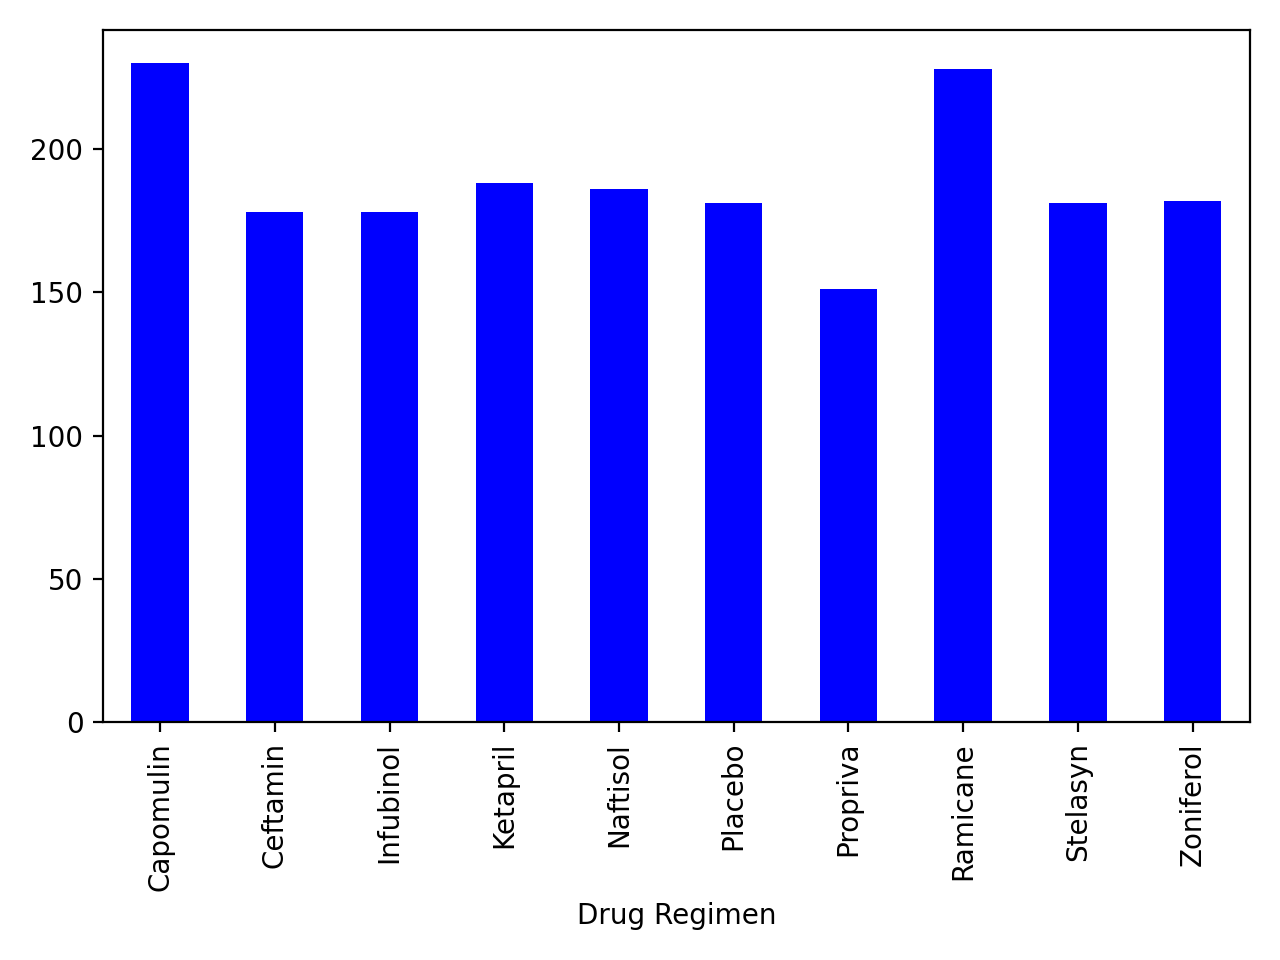

In [232]:
# Create a bar chart based upon the above data
test_chart=test_df.plot(kind="bar", color="b", align="center")
test_chart.set_xlabel = "Drug Regimen"
test_chart.set_ylabel = "Number of mice tested"
plt.show()
plt.tight_layout()